# Lab 7- Data Analysis
# Mariah Noelle Cornelio

Exercises 1-4 are to be completed by March 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [ ]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

In [ ]:
!gunzip SUSY.csv.gz

In [ ]:
ls -lh

The data is provided as a comma separated file.

In [1]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [2]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [3]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [4]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [5]:
FeatureNames

['MT2',
 'S_R',
 'dPhi_r_b',
 'cos_theta_r1',
 'MET_rel',
 'M_Delta_R',
 'axial_MET',
 'R',
 'M_R',
 'M_TR_2']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [7]:
# Making the data smaller
!head -500000 SUSY.csv > SUSY_small.csv
#filename = "SUSY.csv"
filename="SUSY_small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [8]:
# Should make it smaller to 500k rows
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.719035,1.091879,0.291540,1.205962,-1.599117,-1.139445,0.424546,1.154849,0.637185,-0.091178,1.972156,0.697028,0.313636,0.988602,1.981573,0.744828,1.095080,0.006546
499996,1.0,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035
499997,1.0,0.842954,0.332476,-1.048564,1.347989,0.320496,-0.666358,0.450433,-0.411872,0.293407,0.630491,0.859920,0.403371,0.416258,0.591989,0.372003,0.716788,0.366991,0.265798
499998,0.0,1.370760,-1.162912,0.893499,2.118091,1.248496,-0.887211,0.164659,0.316840,0.215165,0.280418,3.087083,0.526929,0.151467,0.308067,3.098183,0.233042,0.876216,0.000593


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [9]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


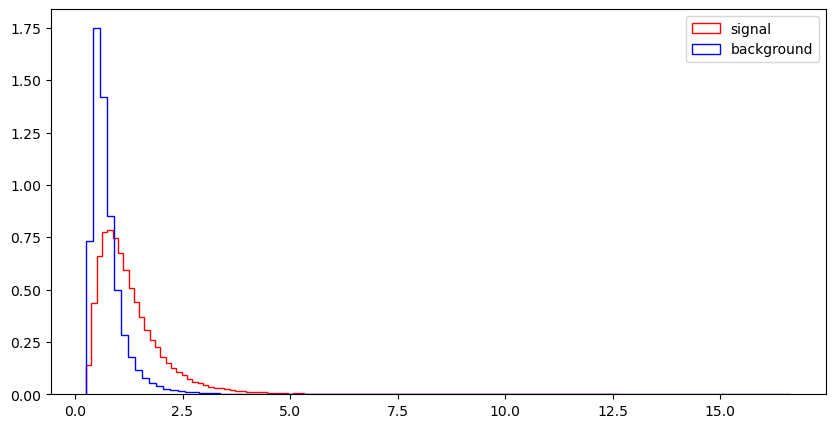

l_1_eta


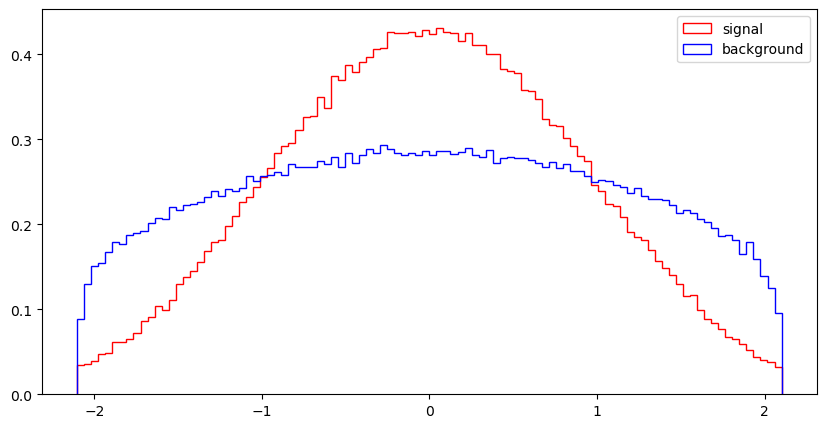

l_1_phi


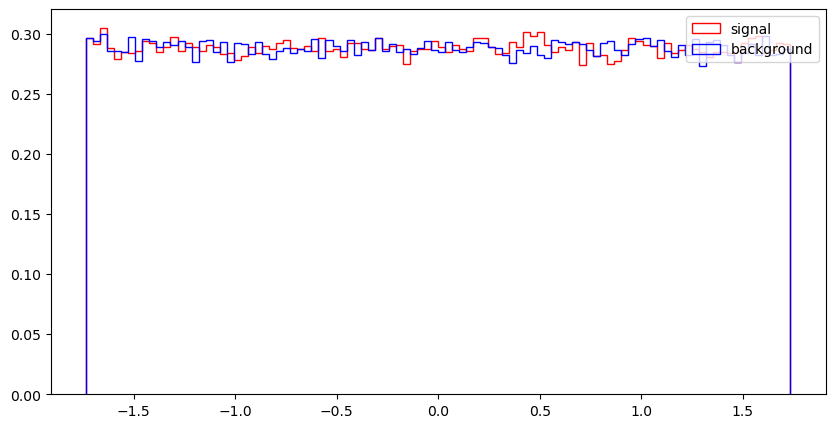

l_2_pT


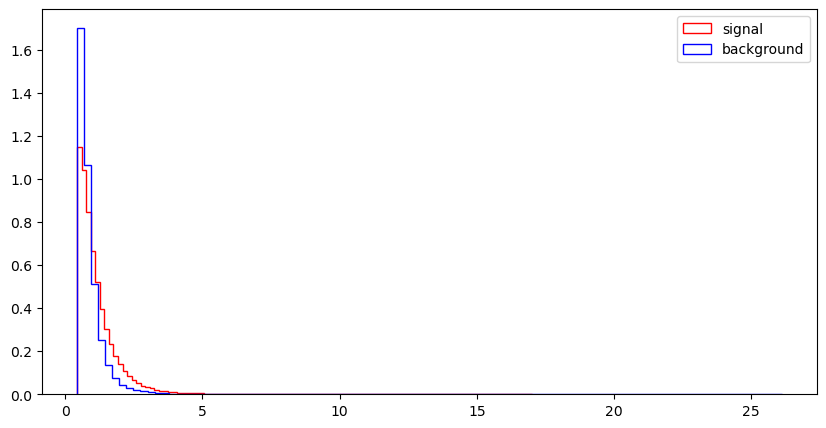

l_2_eta


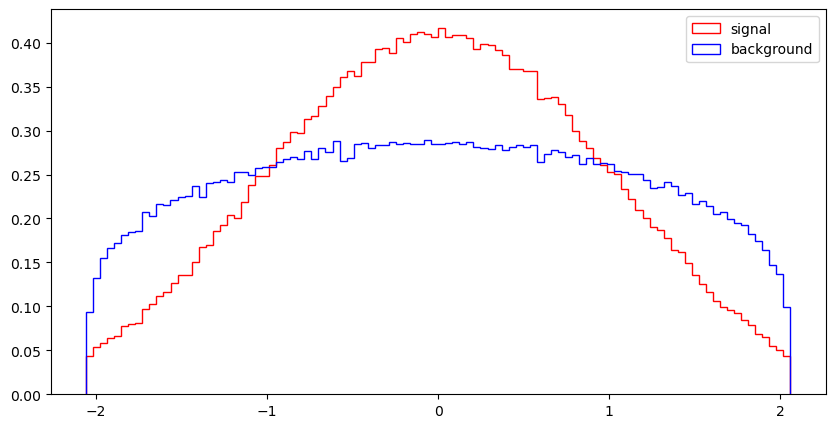

l_2_phi


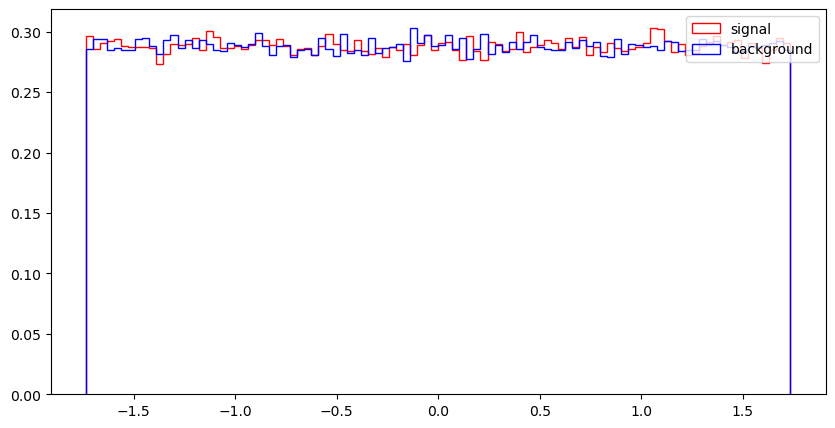

MET


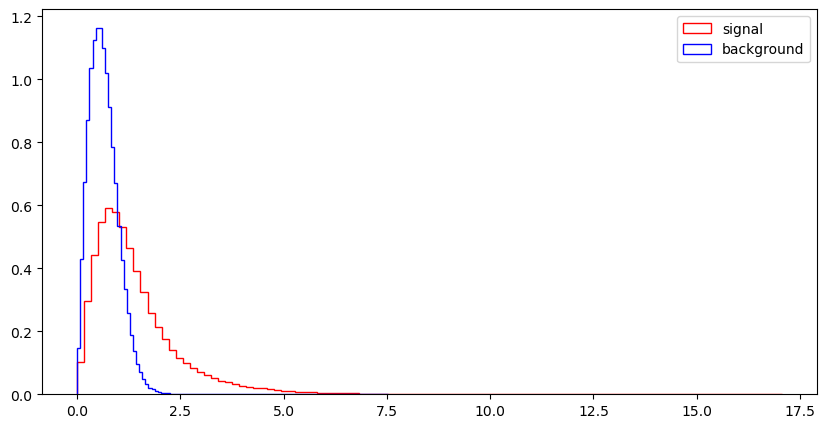

MET_phi


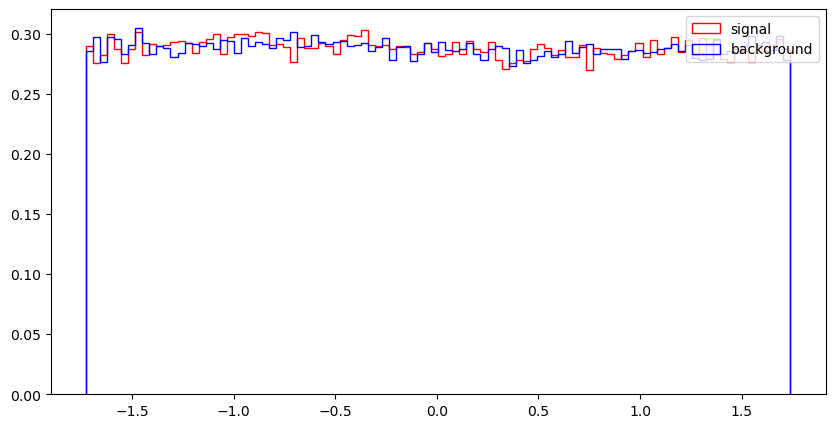

MET_rel


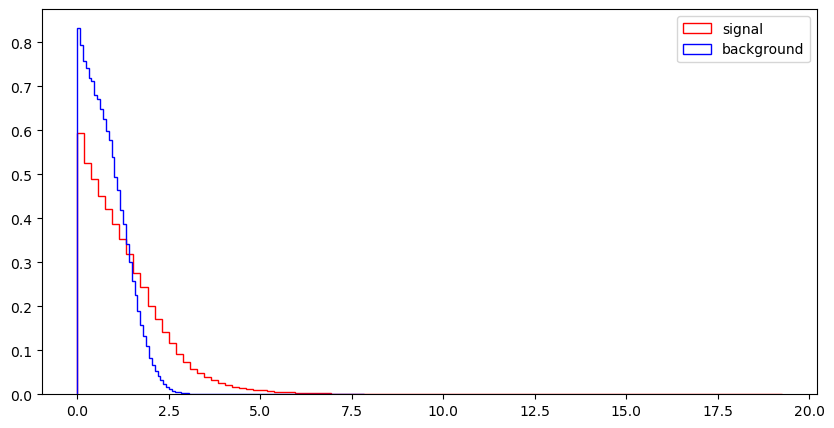

axial_MET


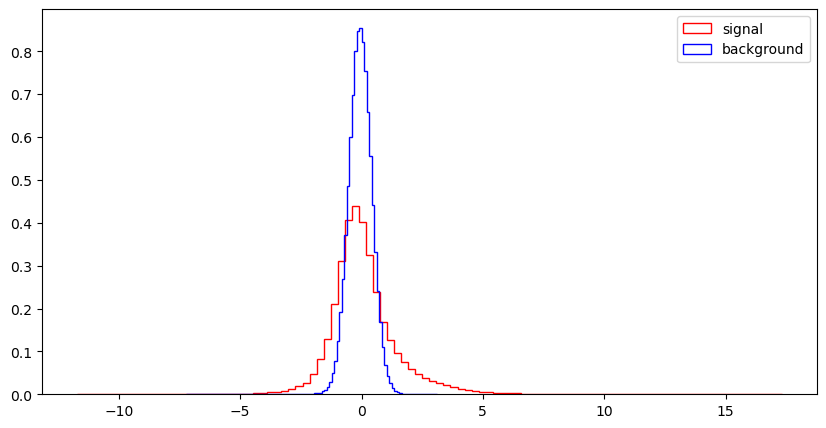

M_R


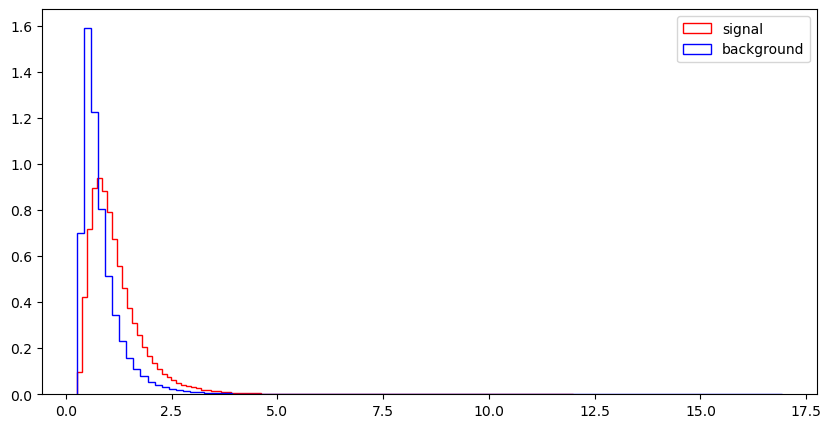

M_TR_2


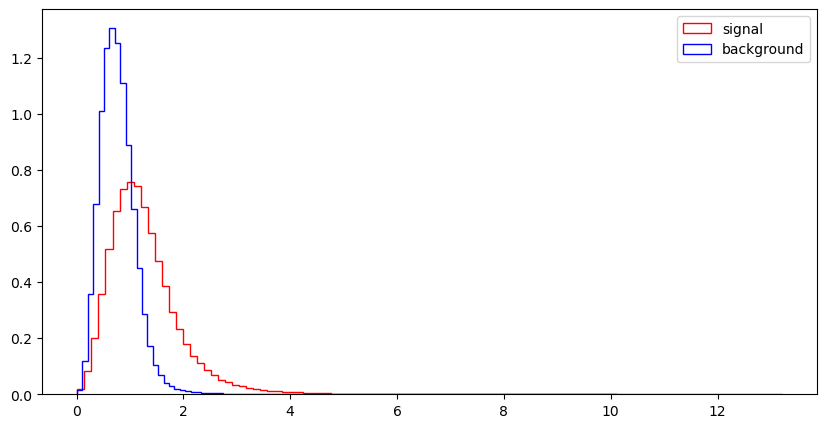

R


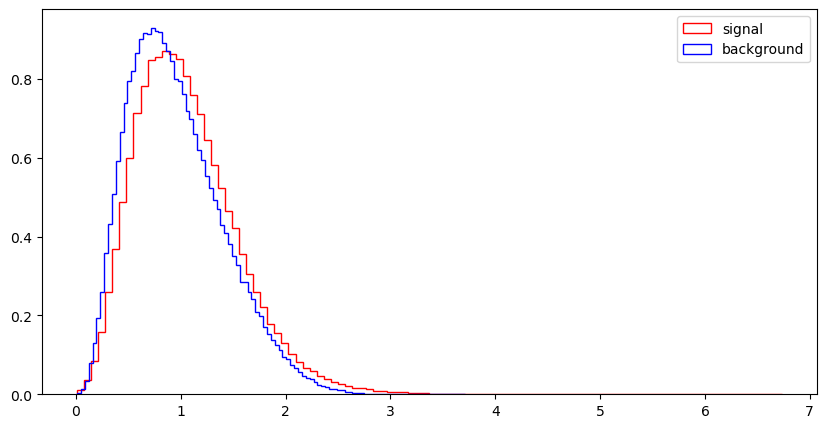

MT2


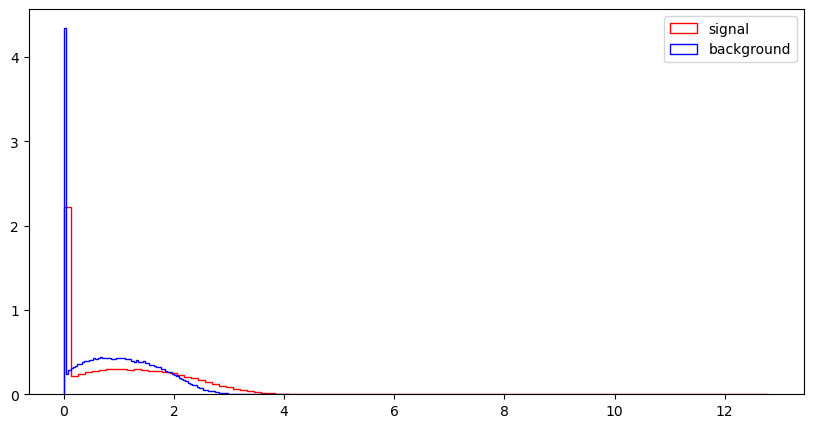

S_R


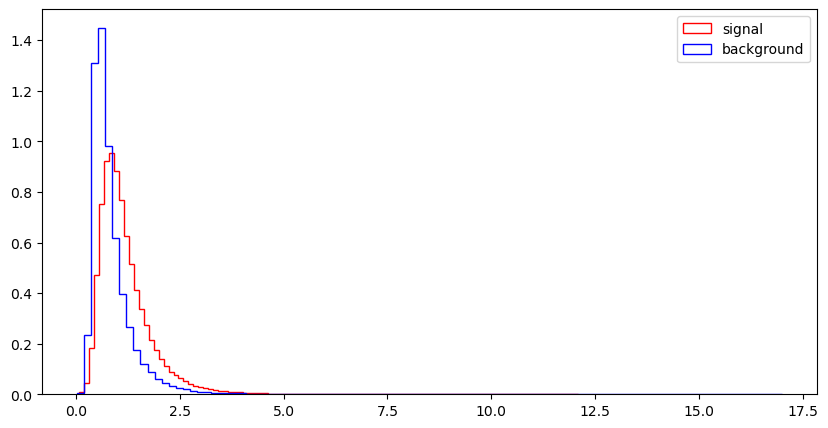

M_Delta_R


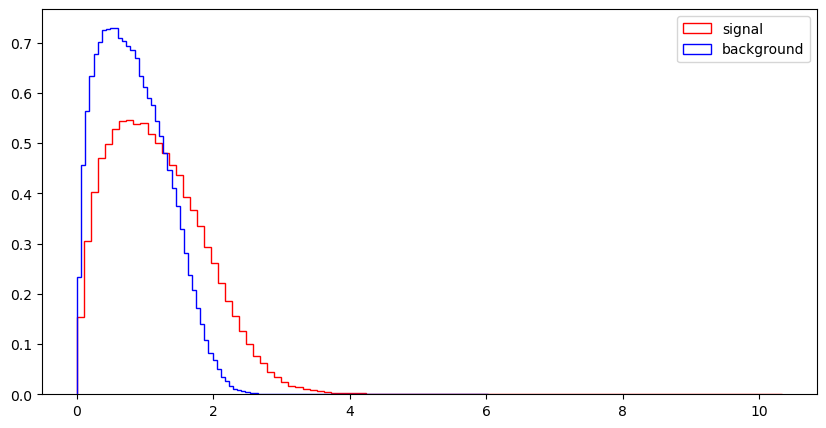

dPhi_r_b


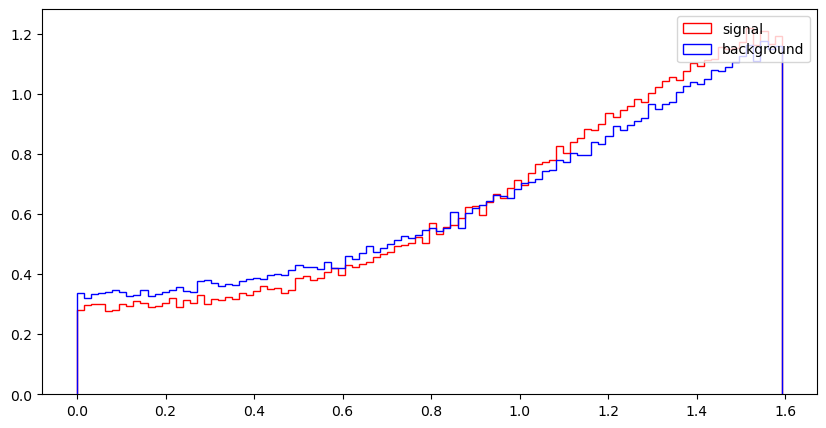

cos_theta_r1


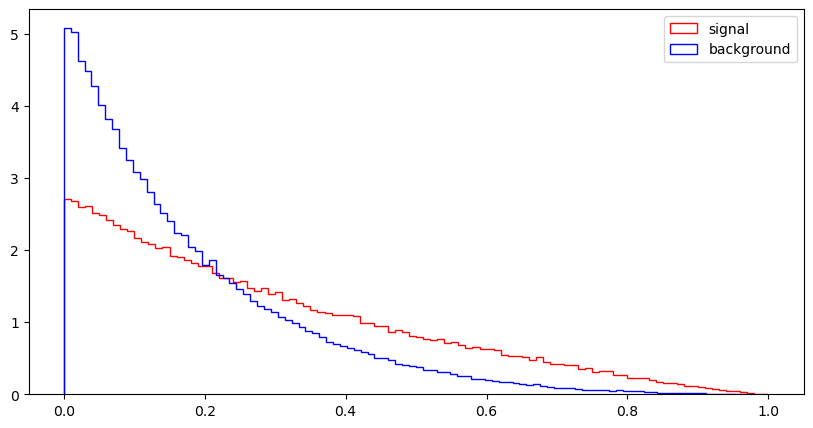

In [10]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

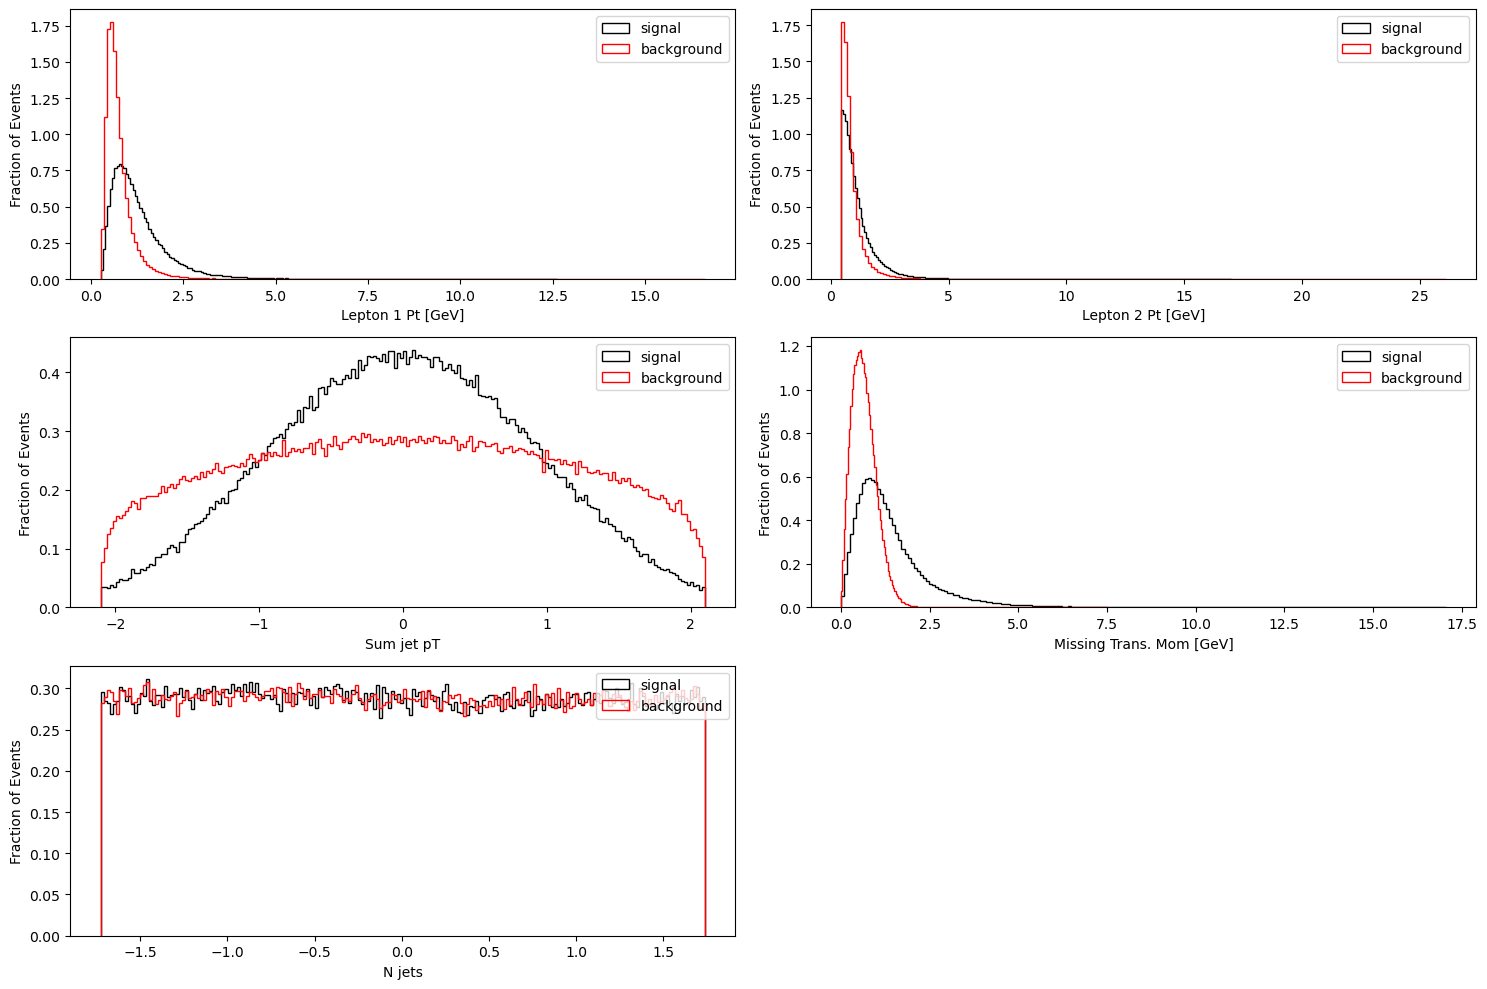

In [11]:
# Figure 5 Low level features - taken from the paper

fig5_vars=["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"]
# I am not sure about thet 3rd, 4th, and 5th variables but the first and second seem
# To match up to the figures in the paper

fig, axs=plt.subplots(3, 2, figsize=(15, 10))
axs=axs.flatten()
titles=["Lepton 1 Pt [GeV]", "Lepton 2 Pt [GeV]", "Sum jet pT", "Missing Trans. Mom [GeV]", "N jets"]

for i, var in enumerate(fig5_vars):
    axs[i].hist(np.array(df_sig[var]), bins=200, histtype="step", color="black", label="signal", density=True, stacked=True)
    axs[i].hist(np.array(df_bkg[var]), bins=200, histtype="step", color="red", label="background", density=True, stacked=True)
    axs[i].set_xlabel(titles[i])
    axs[i].set_ylabel("Fraction of Events")
    axs[i].legend(loc="upper right")

for j in range(len(fig5_vars), len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

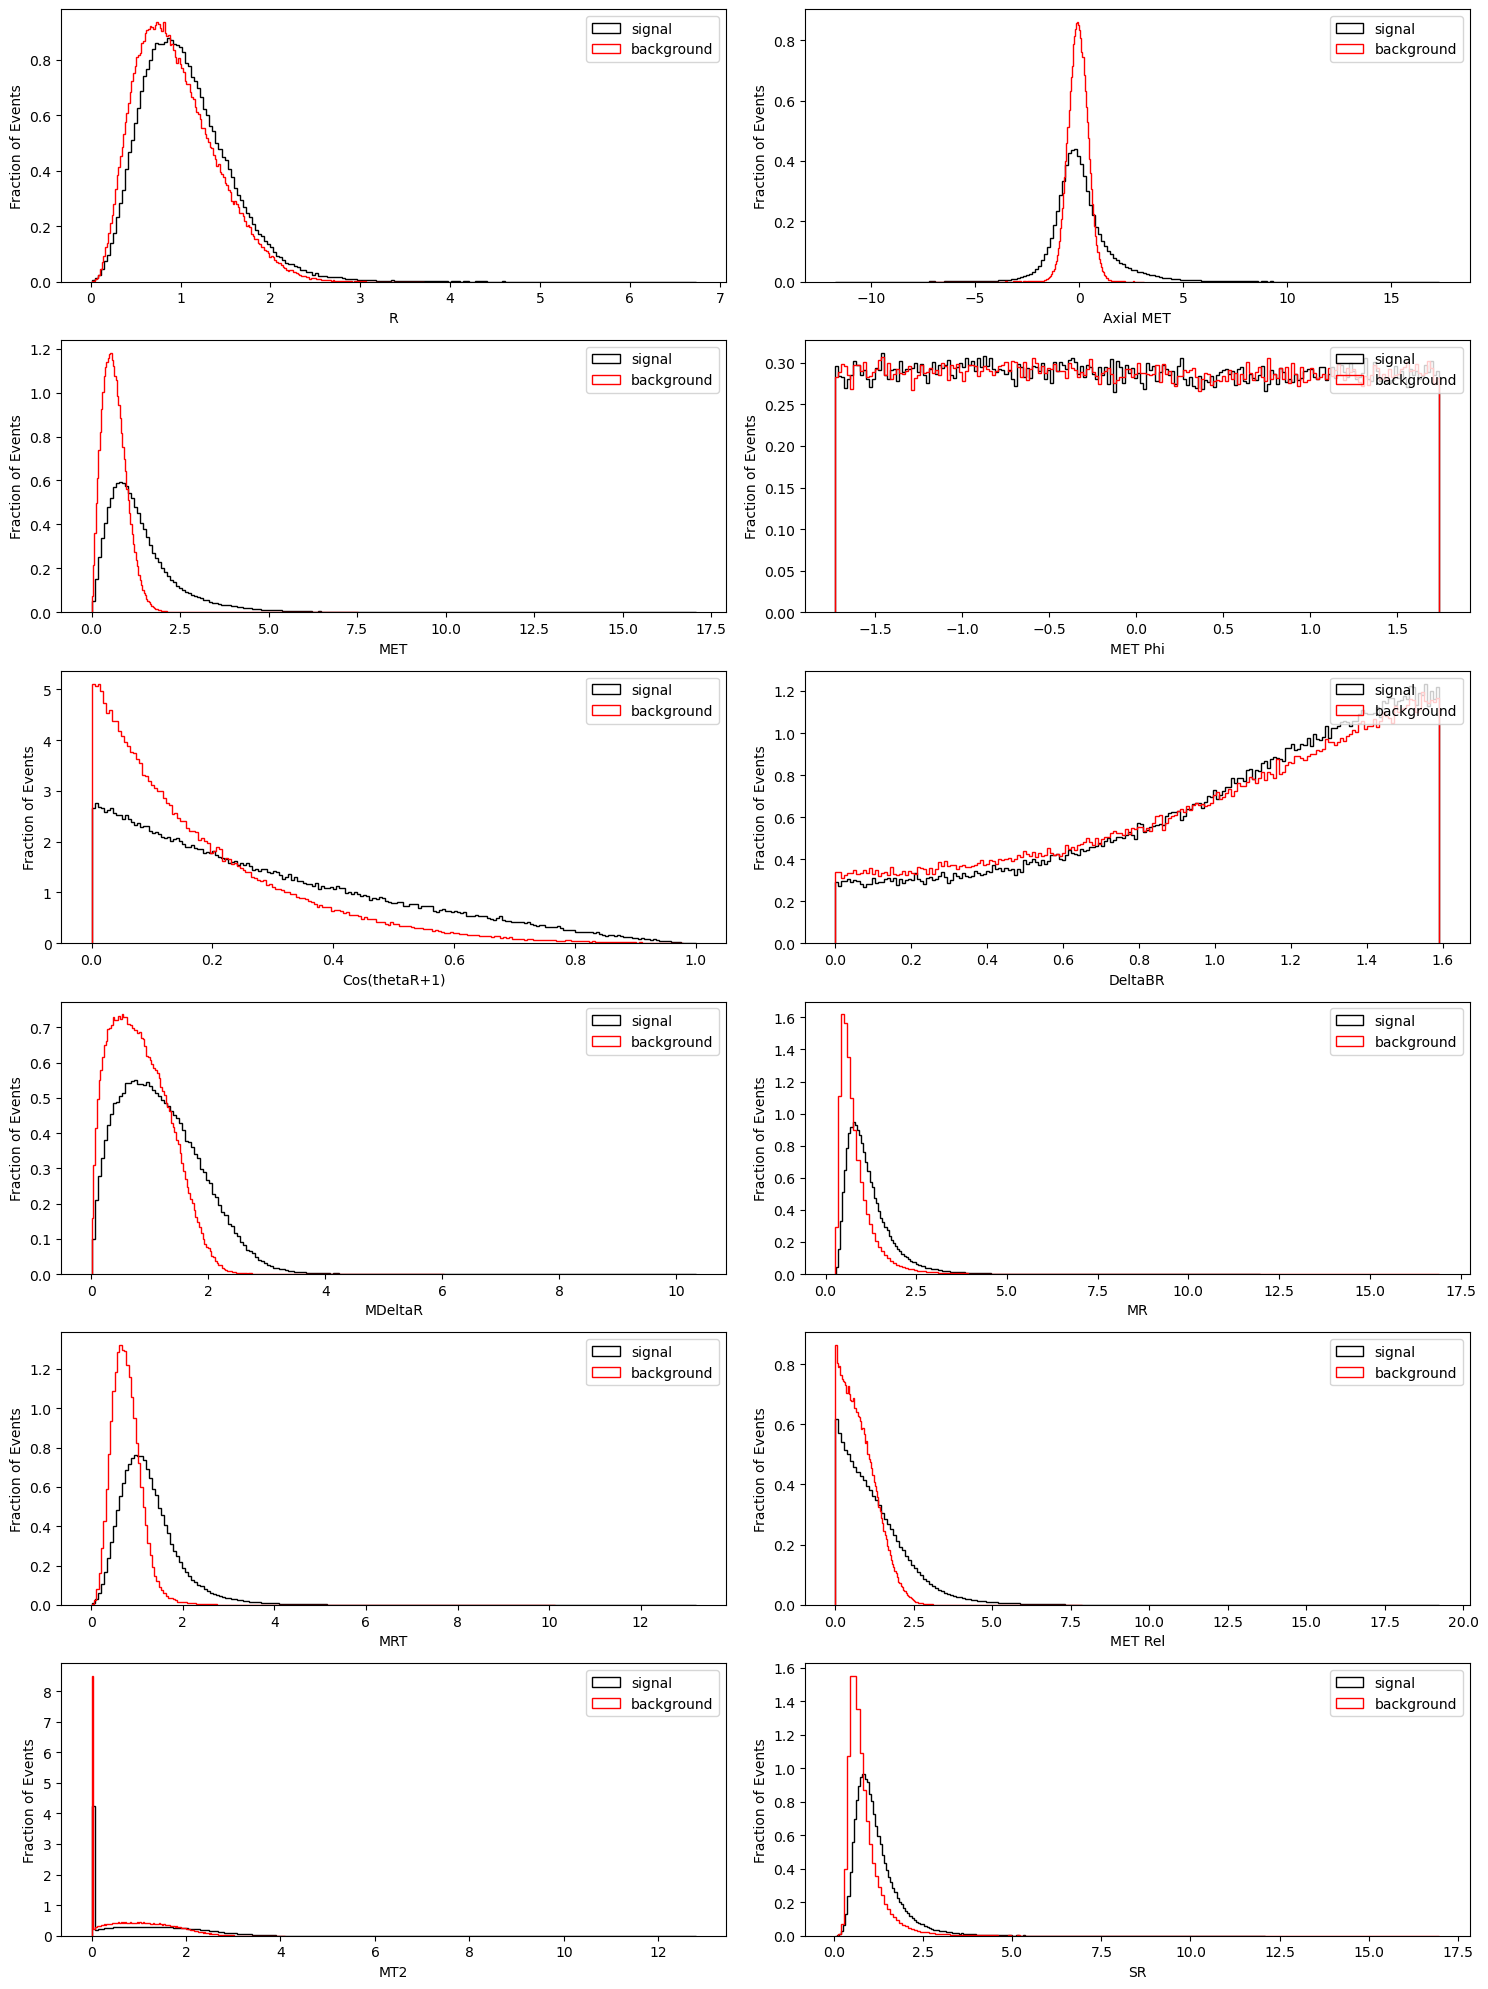

In [12]:
# Figure 6 High level features - taken from the paper

fig6_vars=["R", "axial_MET", "MET", "MET_phi", "cos_theta_r1", "dPhi_r_b", "M_Delta_R", "M_R", "M_TR_2", "MET_rel", "MT2", "S_R"]
titles=["R", "Axial MET", "MET", "MET Phi", "Cos(thetaR+1)", "DeltaBR", "MDeltaR", "MR", "MRT", "MET Rel", "MT2", "SR"]
# I was unsure about the 3rd, 4th, and 9th variable in this list but the rest seem to match up to figure 6 in the paper
# Except on a bigger, more zoomed in scale

fig, axs=plt.subplots(6, 2, figsize=(15, 20))
axs=axs.flatten()

for i, var in enumerate(fig6_vars):
    axs[i].hist(np.array(df_sig[var]), bins=200, histtype="step", color="black", label="signal", density=True, stacked=True)
    axs[i].hist(np.array(df_bkg[var]), bins=200, histtype="step", color="red", label="background", density=True, stacked=True)
    axs[i].set_xlabel(titles[i])
    axs[i].set_ylabel("Fraction of Events")
    axs[i].legend(loc="upper right")

for j in range(len(fig6_vars), len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [16]:
# Part A

## Referring to Dr. Farbin's solutions to help me
# I did not want to copy directly off of his so I tried it myself in the cell below this one...
def compare_distributions(df, column_name, selections, **kwargs):
    for label, selection in selections.items():        
        _ = plt.hist(df[selection][column_name], label=label, **kwargs)

    _ = plt.legend()

def compare_scatter(df, x_var_name, y_var_name, selections, make_legend=True):
    for label, selection in selections.items():   
        _ = plt.scatter(df[selection][x_var_name], df[selection][y_var_name], label=label)

    _ = plt.xlabel(x_var_name)
    _ = plt.ylabel(y_var_name)

    if make_legend:
        _ = plt.legend()

def create_pair_plot(df, columns, selections, alpha=0.5, density=True, bins=50):
    n_columns=len(columns)
    plt.figure(figsize=(15, 15))

    plot_i=0
    for i, x_var_name in enumerate(columns):
        for j, y_var_name in enumerate(columns):
            plot_i+=1
            plt.subplot(n_columns, n_columns, plot_i)
            make_legend= plot_i==1
            if i==j:
                compare_distributions(df, x_var_name, selections, alpha=alpha, density=density, bins=bins)
            else:
                compare_scatter(df, x_var_name, y_var_name, selections, make_legend=make_legend)
                
    plt.tight_layout()
    plt.show()

/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_34400/1933277432.py:36: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


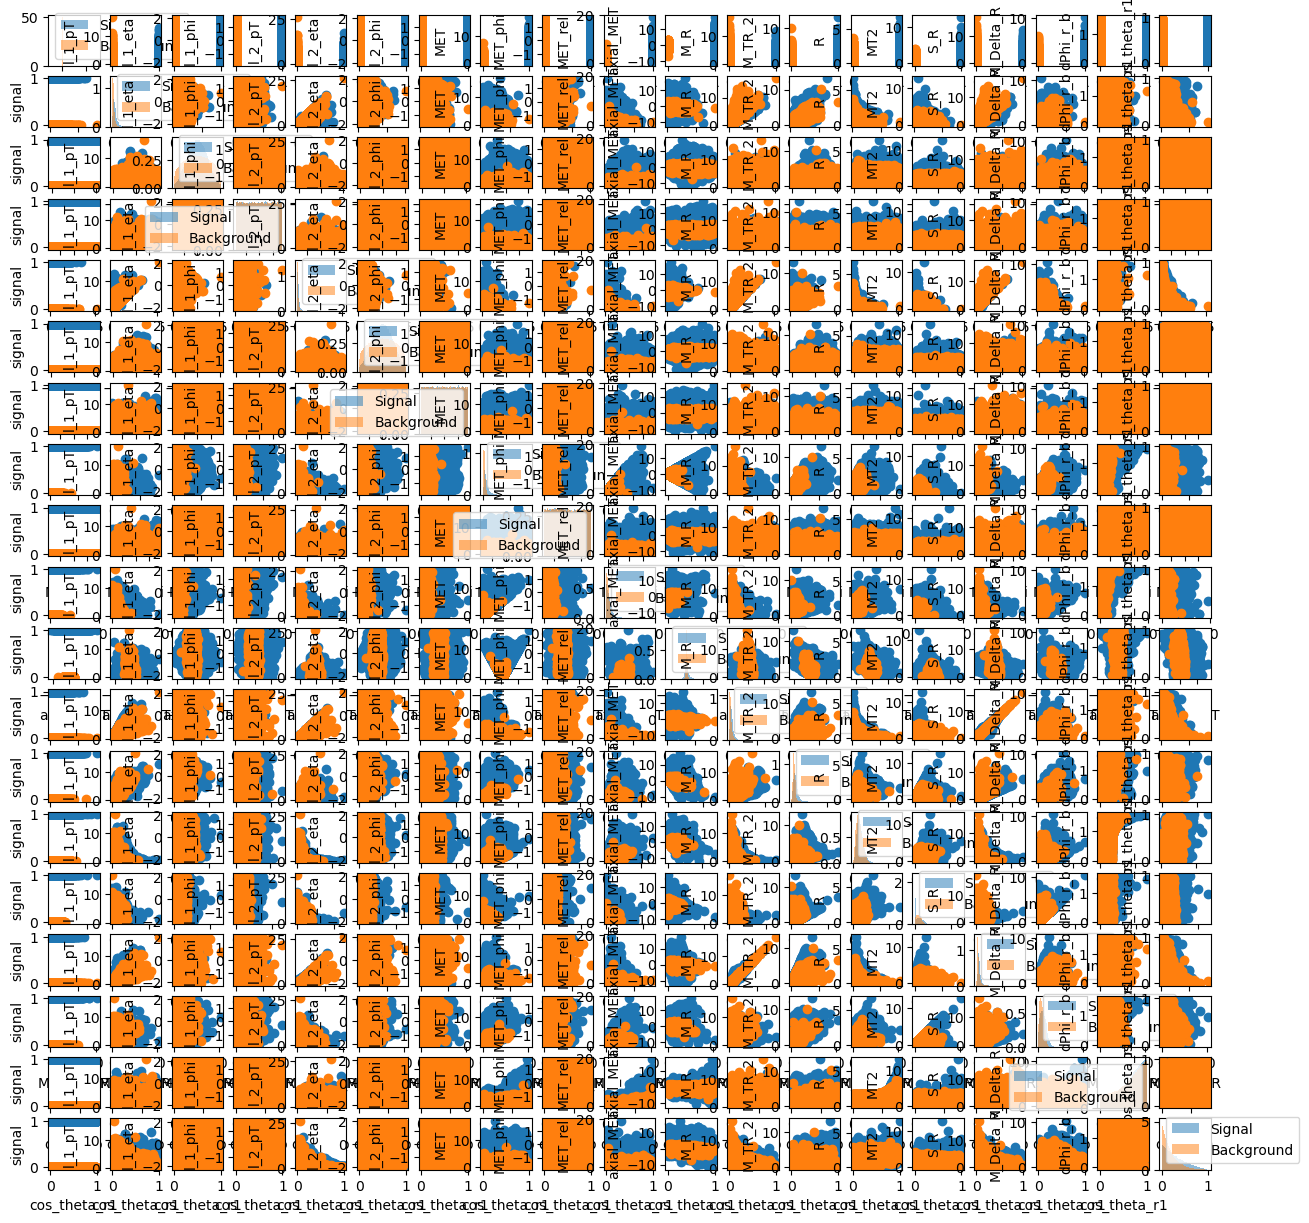

In [17]:
# Part A - testing Dr. Farbin's code

columns=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
selections={"Signal": df["signal"]==1, "Background": df["signal"]==0}
create_pair_plot(df, columns, selections, alpha=0.5, density=True, bins=50)

## This took around ~10 minutes to load I don't want to do it again pleasehsfdbjgwdashg

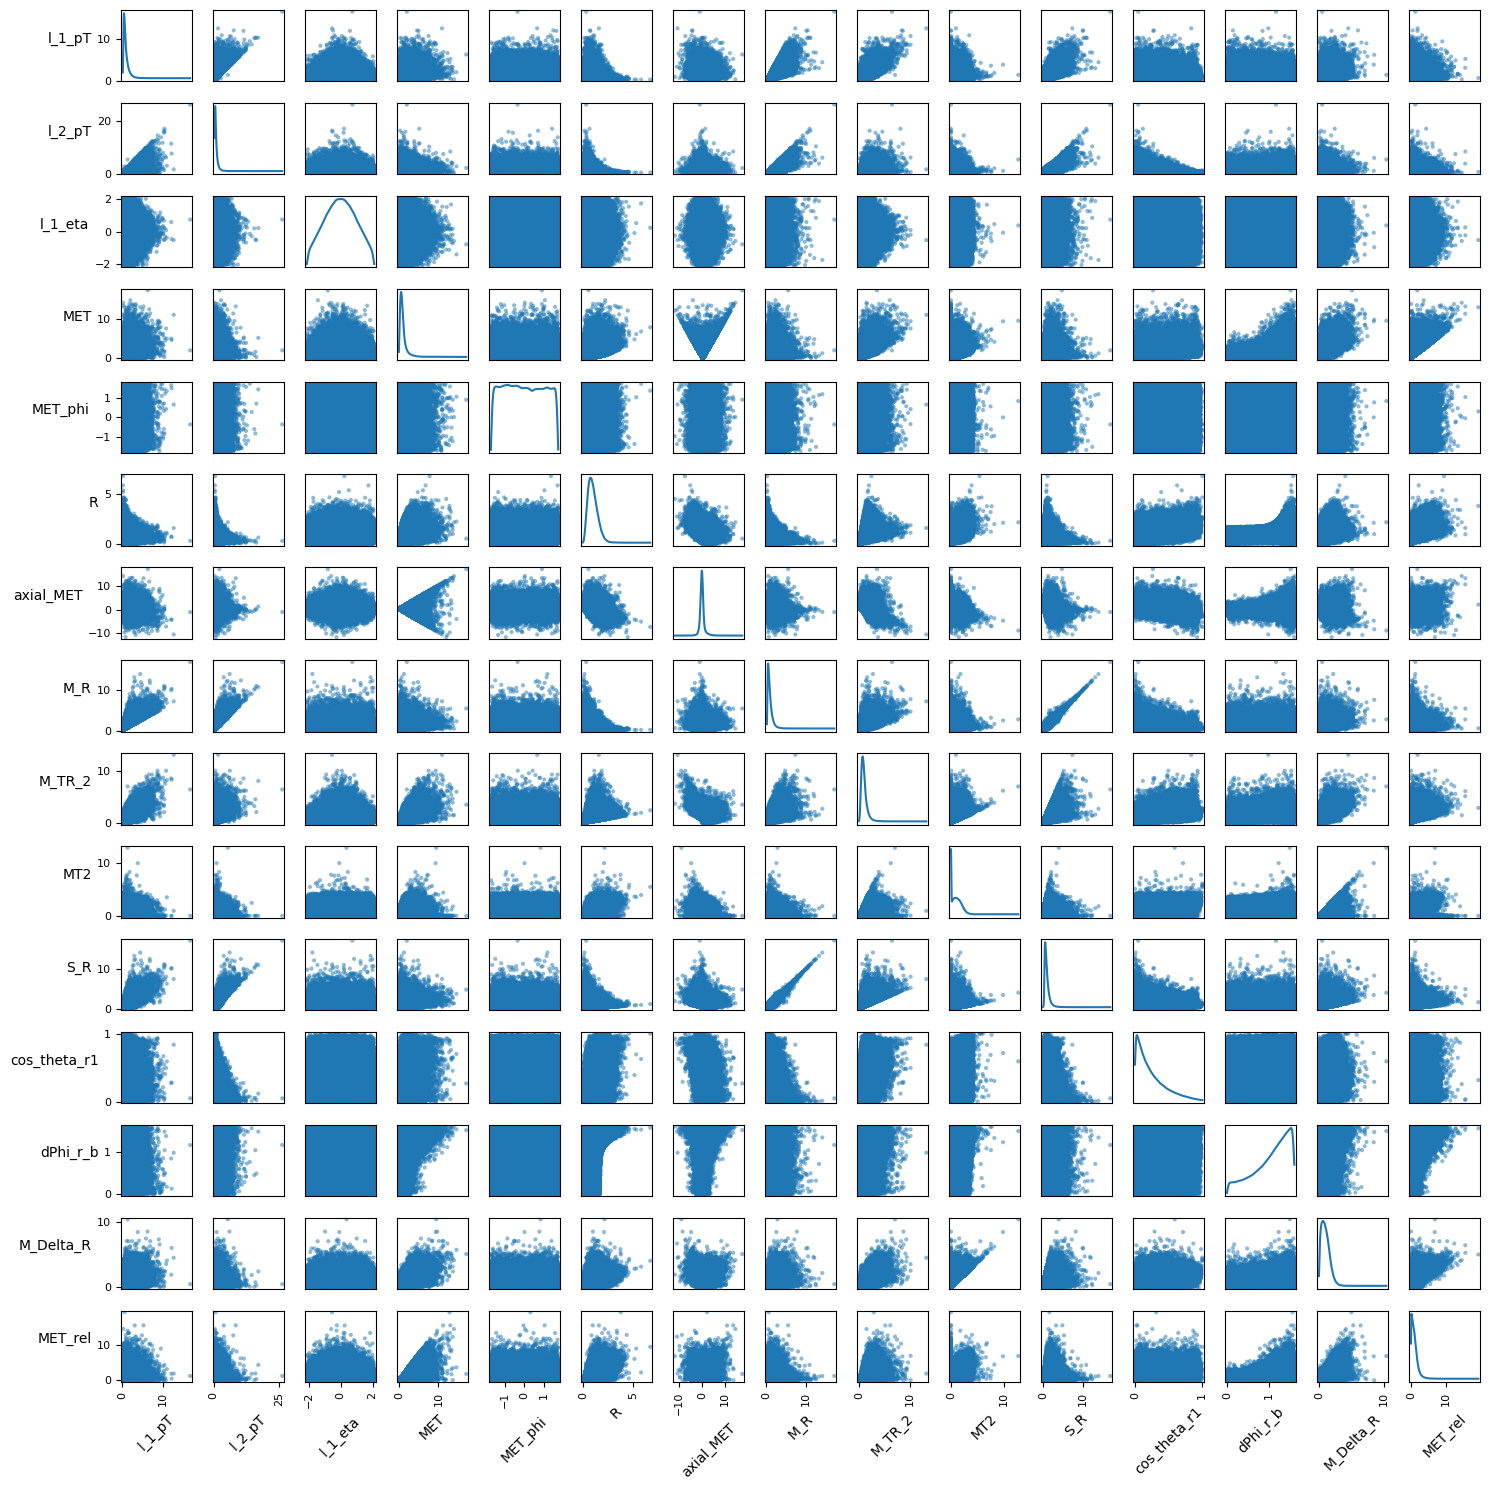

In [14]:
# Part A (except I try it out myself, I don't know if it's right)
## Testing to see if it works 

#low_lvl_features=df[["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"]]
#high_lvl_features=df[["R", "axial_MET", "M_R", "M_TR_2", "MT2", "S_R", "cos_theta_r1", "dPhi_r_b", "M_Delta_R", "MET_rel"]]
#combined_features=pd.concat([low_lvl_features, high_lvl_features], axis=1)

#scatter_matrix = pd.plotting.scatter_matrix(combined_features, figsize=(15, 15), diagonal='kde')
#for ax in scatter_matrix.flatten():
    #ax.xaxis.label.set_rotation(45)
    #ax.yaxis.label.set_rotation(0)
    #ax.yaxis.label.set_ha('right')

#plt.tight_layout()
#plt.show()

## ^^ it works!!

## Now making it into a function - it took 5 minutes to make this!!!
def create_pair_plot(df):
    low_lvl_features=df[["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"]]
    high_lvl_features=df[["R", "axial_MET", "M_R", "M_TR_2", "MT2", "S_R", "cos_theta_r1", "dPhi_r_b", "M_Delta_R", "MET_rel"]]
    combined_features=pd.concat([low_lvl_features, high_lvl_features], axis=1)
    scatter_matrix=pd.plotting.scatter_matrix(combined_features, figsize=(15, 15), diagonal='kde')

    for ax in scatter_matrix.flatten():
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

    plt.tight_layout()
    plt.show()
    
## Testing my solution to part A    
# create_pair_plot(df)

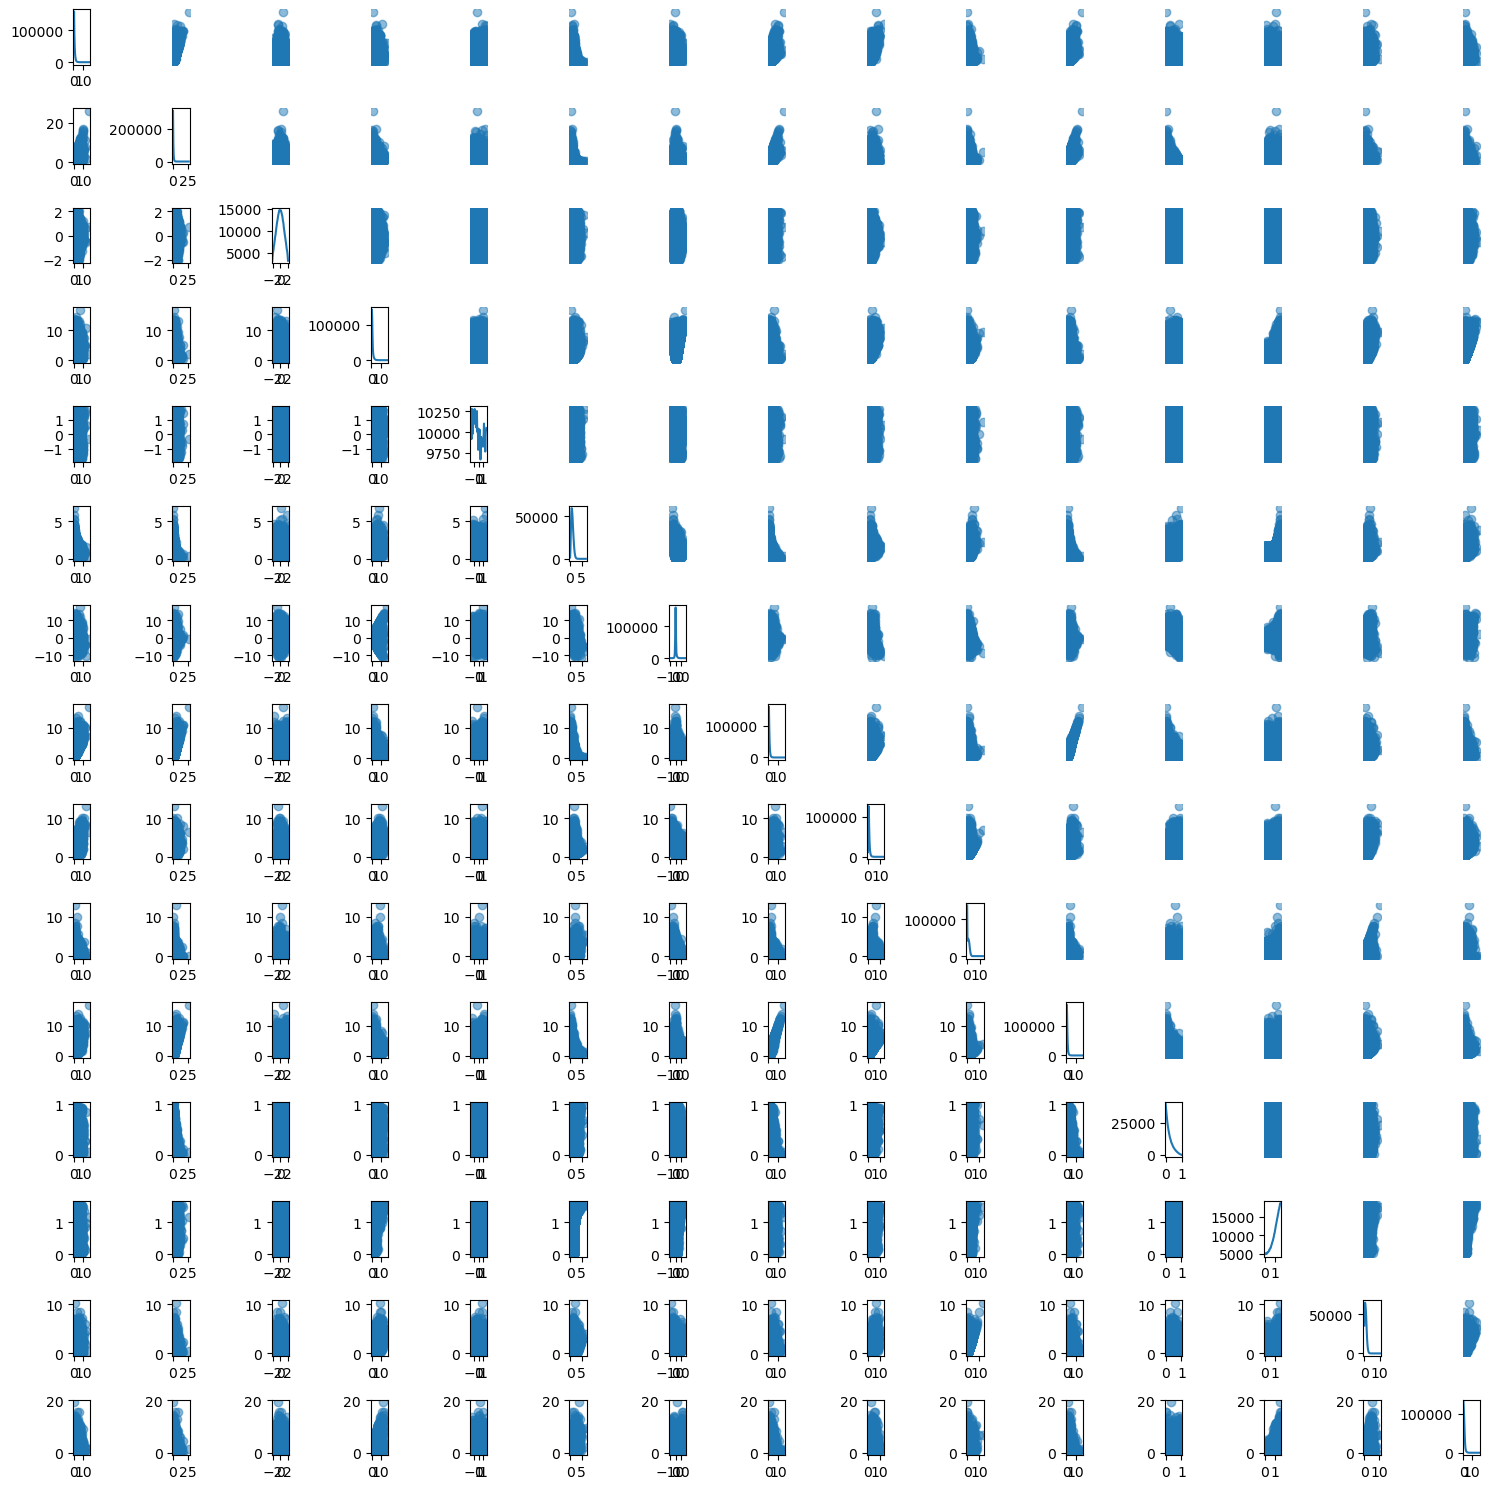

In [15]:
# Part B
## To make pairplots run faster, you can first create the histograms and scatterplots itself 
## and then add it to a subplot grid using a for loop similar to what we did in question 3. 
## This method was definitely faster. It only took 1-2 minutes to load. 

def create_pair_plot(df):
    low_lvl_features=df[["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"]]
    high_lvl_features=df[["R", "axial_MET", "M_R", "M_TR_2", "MT2", "S_R", "cos_theta_r1", "dPhi_r_b", "M_Delta_R", "MET_rel"]]
    combined_features=pd.concat([low_lvl_features, high_lvl_features], axis=1)
    n_columns=len(combined_features.columns)
    
    # Creating the subplot matrix (similar to my question 3 solution)
    fig, axs=plt.subplots(n_columns, n_columns, figsize=(15, 15))
    for i, col1 in enumerate(combined_features.columns):
        for j, col2 in enumerate(combined_features.columns):
            if i==j:# If i==j, then that means this will place it on the diagonal 
                for label, selection in {"All Data": df}.items():
                    data=selection[col1]
                    hist, bins=np.histogram(data, bins=50)
                    bin_centers=(bins[:-1] + bins[1:])/2 # Saw this on google to calculate the center
                    axs[i, j].plot(bin_centers, hist, label=label)
            else: # This puts my scatterplots everywhere else that is not the diagonal
                for label, selection in {"All Data": df}.items():
                    axs[i, j].scatter(selection[col2], selection[col1], label=label, alpha=0.5)
    
            axs[i, j].xaxis.label.set_rotation(45)
            axs[i, j].yaxis.label.set_rotation(0)
            axs[i, j].yaxis.label.set_ha('right')
    
    for i in range(len(combined_features.columns)):
        for j in range(i + 1, len(combined_features.columns)):
            axs[i, j].axis("off")
    
    plt.tight_layout()
    plt.show()

## Testing my solution
# create_pair_plot(df)


In [ ]:
# Part C 

## I am going to use Dr. Farbin's Part A output because I forgot to specify background and signal
## for mine and respectfully, I don't want to wait 30-40 minutes for my graphs to load if it is
## incorrect. 

## From the pairplot, it seems that the blue(signal) and orange(background) are most separated or
## divided with the Met_phi, axial_MET, M_R, and MT2 columns. There are probably more but those
## were the ones that were most noticeable to me. 

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [18]:
# Part A

## I did pip install tabulate in my terminal
import tabulate

In [20]:
## Part B

# Observables part
# These are just the column names from the SUSY dataset
observables=["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", 
               "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", 
               "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

observables_data=df[observables].values
observables_covariance_matrix=np.cov(observables_data, rowvar=False)
observables_correlation_matrix=np.corrcoef(observables_data, rowvar=False)

# Low and high level features part
low_lvl_features=df[["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"]]
high_lvl_features=df[["R", "axial_MET", "M_R", "M_TR_2", "MT2", "S_R", "cos_theta_r1", "dPhi_r_b", "M_Delta_R", "MET_rel"]]

low_lvl_data=low_lvl_features.values
low_lvl_covariance_matrix=np.cov(low_lvl_data, rowvar=False)
low_lvl_correlation_matrix=np.corrcoef(low_lvl_data, rowvar=False)
high_lvl_data=high_lvl_features.values
high_lvl_covariance_matrix=np.cov(high_lvl_data, rowvar=False)
high_lvl_correlation_matrix=np.corrcoef(high_lvl_data, rowvar=False)

## Testing my solutions
print("Covariance matrix between observables:")
print(observables_covariance_matrix)
print("\nCorrelation matrix between all observables:")
print(observables_correlation_matrix)

print("\nCovariance matrix between low-level features:")
print(low_lvl_covariance_matrix)
print("\nCorrelation matrix between low-level features:")
print(low_lvl_correlation_matrix)

print("\nCovariance matrix between high-level features:")
print(high_lvl_covariance_matrix)
print("\nCorrelation matrix between high-level features:")
print(high_lvl_correlation_matrix)


Covariance matrix between observables:
[[ 2.48277416e-01  1.33232757e-01  2.12325710e-04  2.16279213e-04
   6.39160758e-02  7.12813644e-04  1.69378344e-04  1.91292671e-01
  -2.94538711e-04  1.25444316e-01  3.95416984e-02  8.43578631e-02
   1.23325980e-01  2.55957040e-02  3.41362834e-02  8.06149789e-02
   8.51836173e-02  7.12762018e-03  2.61996466e-02]
 [ 1.33232757e-01  4.67481925e-01 -3.96674207e-04  7.66214265e-05
   3.05037988e-01 -3.48826988e-04  7.37336647e-04  2.28434336e-01
  -9.36714374e-04  9.75240349e-02 -9.73253567e-03  3.64432455e-01
   2.87223483e-01 -5.97024601e-02 -1.23988205e-02  3.42587023e-01
   9.77389248e-02 -4.69491360e-02  2.21632465e-02]
 [ 2.12325710e-04 -3.96674207e-04  1.00430144e+00 -8.57630732e-04
  -1.62905654e-04  4.08312894e-01 -1.04201049e-03 -2.14697798e-03
  -5.88968323e-04 -1.37057212e-03 -1.10889241e-03 -5.53826632e-04
  -6.68920291e-04  3.01299870e-04  4.27122683e-04 -6.04009571e-04
  -9.87471350e-04 -7.40330277e-04  3.21632240e-04]
 [ 2.16279213e-0

In [22]:
# Part C
from tabulate import tabulate

observables_headers=["Observables"]+observables
headers_low_lvl=["Low-Level Features"]+list(low_lvl_features.columns)
headers_high_lvl=["High-Level Features"]+list(high_lvl_features.columns)

observables_covariance_matrix_str=[["Covariance Matrix"] + ["{:.2f}".format(value) for value in row] for row in observables_covariance_matrix]
observables_correlation_matrix_str=[["Correlation Matrix"] + ["{:.2f}".format(value) for value in row] for row in observables_correlation_matrix]
low_lvl_covariance_matrix_str=[["Covariance Matrix"] + ["{:.2f}".format(value) for value in row] for row in low_lvl_covariance_matrix]
low_lvl_correlation_matrix_str=[["Correlation Matrix"] + ["{:.2f}".format(value) for value in row] for row in low_lvl_correlation_matrix]
high_lvl_covariance_matrix_str=[["Covariance Matrix"] + ["{:.2f}".format(value) for value in row] for row in high_lvl_covariance_matrix]
high_lvl_correlation_matrix_str=[["Correlation Matrix"] + ["{:.2f}".format(value) for value in row] for row in high_lvl_correlation_matrix]

In [24]:
## Part C - my observables tabulate

print("Covariance Matrix and Correlation Matrix for All Observables:")
print(tabulate(observables_covariance_matrix_str, headers=observables_headers))
print("\n")
print(tabulate(observables_correlation_matrix_str, headers=observables_headers))

Covariance Matrix and Correlation Matrix for All Observables:
Observables          signal    l_1_pT    l_1_eta    l_1_phi    l_2_pT    l_2_eta    l_2_phi    MET    MET_phi    MET_rel    axial_MET    M_R    M_TR_2      R    MT2    S_R    M_Delta_R    dPhi_r_b    cos_theta_r1
-----------------  --------  --------  ---------  ---------  --------  ---------  ---------  -----  ---------  ---------  -----------  -----  --------  -----  -----  -----  -----------  ----------  --------------
Covariance Matrix      0.25      0.13       0          0         0.06       0          0      0.19      -0          0.13         0.04   0.08      0.12   0.03   0.03   0.08         0.09        0.01            0.03
Covariance Matrix      0.13      0.47      -0          0         0.31      -0          0      0.23      -0          0.1         -0.01   0.36      0.29  -0.06  -0.01   0.34         0.1        -0.05            0.02
Covariance Matrix      0        -0          1         -0        -0          0.41      

In [25]:
## Part C - my low_lvl_features tabulate

print("Covariance Matrix and Correlation Matrix for Low-Level Features:")
print(tabulate(low_lvl_covariance_matrix_str, headers=headers_low_lvl))
print("\n")
print(tabulate(low_lvl_correlation_matrix_str, headers=headers_low_lvl))

Covariance Matrix and Correlation Matrix for Low-Level Features:
Low-Level Features      l_1_pT    l_2_pT    l_1_eta    MET    MET_phi
--------------------  --------  --------  ---------  -----  ---------
Covariance Matrix         0.47      0.31         -0   0.23         -0
Covariance Matrix         0.31      0.43         -0   0.08         -0
Covariance Matrix        -0        -0             1  -0            -0
Covariance Matrix         0.23      0.08         -0   0.76         -0
Covariance Matrix        -0        -0            -0  -0             1


Low-Level Features      l_1_pT    l_2_pT    l_1_eta    MET    MET_phi
--------------------  --------  --------  ---------  -----  ---------
Correlation Matrix        1         0.68         -0   0.38         -0
Correlation Matrix        0.68      1            -0   0.14         -0
Correlation Matrix       -0        -0             1  -0            -0
Correlation Matrix        0.38      0.14         -0   1            -0
Correlation Matrix     

In [26]:
## Part C - my high_lvl_features tabulate

print("Covariance Matrix and Correlation Matrix for High-Level Features:")
print(tabulate(high_lvl_covariance_matrix_str, headers=headers_high_lvl))
print("\n")
print(tabulate(high_lvl_correlation_matrix_str, headers=headers_high_lvl))

Covariance Matrix and Correlation Matrix for High-Level Features:
High-Level Features        R    axial_MET    M_R    M_TR_2    MT2    S_R    cos_theta_r1    dPhi_r_b    M_Delta_R    MET_rel
---------------------  -----  -----------  -----  --------  -----  -----  --------------  ----------  -----------  ---------
Covariance Matrix       0.22        -0.18  -0.11      0.1    0.23  -0.08            0.06        0.09         0.17       0.25
Covariance Matrix      -0.18         1.01   0.02     -0.19  -0.46  -0.04           -0.05       -0.03        -0.23      -0.12
Covariance Matrix      -0.11         0.02   0.39      0.21  -0.04   0.38           -0.01       -0.03         0.07       0.04
Covariance Matrix       0.1         -0.19   0.21      0.34   0.19   0.23            0.05        0.06         0.24       0.3
Covariance Matrix       0.23        -0.46  -0.04      0.19   0.74  -0.01            0.04        0.02         0.43       0.41
Covariance Matrix      -0.08        -0.04   0.38      0.23  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

In [27]:
## Part C - embedding my tabulates into the notebook

from IPython.display import HTML, display
from tabulate import tabulate

observables_covariance_html=tabulate(observables_covariance_matrix_str, headers=observables_headers, tablefmt="html")
observables_correlation_html=tabulate(observables_correlation_matrix_str, headers=observables_headers, tablefmt="html")
low_lvl_covariance_html=tabulate(low_lvl_covariance_matrix_str, headers=headers_low_lvl, tablefmt="html")
low_lvl_correlation_html=tabulate(low_lvl_correlation_matrix_str, headers=headers_low_lvl, tablefmt="html")
high_lvl_covariance_html=tabulate(high_lvl_covariance_matrix_str, headers=headers_high_lvl, tablefmt="html")
high_lvl_correlation_html=tabulate(high_lvl_correlation_matrix_str, headers=headers_high_lvl, tablefmt="html")

display(HTML("<h3>Observables Covariance Matrix</h3>"+observables_covariance_html))
display(HTML("<h3>Observables Correlation Matrix</h3>"+observables_correlation_html))
display(HTML("<h3>Low-Level Features Covariance Matrix</h3>"+low_lvl_covariance_html))
display(HTML("<h3>Low-Level Features Correlation Matrix</h3>"+low_lvl_correlation_html))
display(HTML("<h3>High-Level Features Covariance Matrix</h3>"+high_lvl_covariance_html))
display(HTML("<h3>High-Level Features Correlation Matrix</h3>"+high_lvl_correlation_html))


Observables,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
Covariance Matrix,0.25,0.13,0,0,0.06,0,0,0.19,-0,0.13,0.04,0.08,0.12,0.03,0.03,0.08,0.09,0.01,0.03
Covariance Matrix,0.13,0.47,-0,0,0.31,-0,0,0.23,-0,0.1,-0.01,0.36,0.29,-0.06,-0.01,0.34,0.1,-0.05,0.02
Covariance Matrix,0,-0,1,-0,-0,0.41,-0,-0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,0
Covariance Matrix,0,0,-0,1,0,0,-0.27,0,-0.18,0,-0,0,0,0,0,0,0,0,0
Covariance Matrix,0.06,0.31,-0,0,0.43,-0,0,0.08,-0,-0,0.05,0.33,0.16,-0.1,-0.07,0.32,0.01,-0,-0.03
Covariance Matrix,0,-0,0.41,0,-0,1.01,0,0,-0,0,-0,-0,0,0,0,-0,0,-0,0
Covariance Matrix,0,0,-0,-0.27,0,0,1,-0,-0.04,0,-0,0,0,0,0,0,0,-0,0
Covariance Matrix,0.19,0.23,-0,0,0.08,0,-0,0.76,-0,0.55,0.15,0.14,0.37,0.19,0.15,0.17,0.32,0.15,0.07
Covariance Matrix,-0,-0,-0,-0.18,-0,-0,-0.04,-0,1,-0,-0,-0,-0,-0,0,-0,-0,-0,0
Covariance Matrix,0.13,0.1,-0,0,-0,0,0,0.55,-0,0.79,-0.12,0.04,0.3,0.25,0.41,0.08,0.41,0.15,0.06


Observables,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
Correlation Matrix,1,0.39,0,0,0.2,0,0,0.44,-0,0.28,0.08,0.27,0.43,0.11,0.08,0.26,0.27,0.03,0.27
Correlation Matrix,0.39,1,-0,0,0.68,-0,0,0.38,-0,0.16,-0.01,0.85,0.72,-0.19,-0.02,0.81,0.23,-0.16,0.16
Correlation Matrix,0,-0,1,-0,-0,0.41,-0,-0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,0
Correlation Matrix,0,0,-0,1,0,0,-0.27,0,-0.18,0,-0,0,0,0,0,0,0,0,0
Correlation Matrix,0.2,0.68,-0,0,1,-0,0,0.14,-0,-0,0.08,0.8,0.43,-0.32,-0.12,0.8,0.01,-0.01,-0.22
Correlation Matrix,0,-0,0.41,0,-0,1,0,0,-0,0,-0,-0,0,0,0,-0,0,-0,0
Correlation Matrix,0,0,-0,-0.27,0,0,1,-0,-0.04,0,-0,0,0,0,0,0,0,-0,0
Correlation Matrix,0.44,0.38,-0,0,0.14,0,-0,1,-0,0.7,0.18,0.26,0.72,0.46,0.21,0.31,0.58,0.38,0.42
Correlation Matrix,-0,-0,-0,-0.18,-0,-0,-0.04,-0,1,-0.01,-0,-0,-0,-0,0,-0,-0,-0,0
Correlation Matrix,0.28,0.16,-0,0,-0,0,0,0.7,-0.01,1,-0.13,0.08,0.58,0.59,0.54,0.15,0.75,0.38,0.32


Low-Level Features,l_1_pT,l_2_pT,l_1_eta,MET,MET_phi
Covariance Matrix,0.47,0.31,-0,0.23,-0
Covariance Matrix,0.31,0.43,-0,0.08,-0
Covariance Matrix,-0,-0,1,-0,-0
Covariance Matrix,0.23,0.08,-0,0.76,-0
Covariance Matrix,-0,-0,-0,-0,1


Low-Level Features,l_1_pT,l_2_pT,l_1_eta,MET,MET_phi
Correlation Matrix,1,0.68,-0,0.38,-0
Correlation Matrix,0.68,1,-0,0.14,-0
Correlation Matrix,-0,-0,1,-0,-0
Correlation Matrix,0.38,0.14,-0,1,-0
Correlation Matrix,-0,-0,-0,-0,1


High-Level Features,R,axial_MET,M_R,M_TR_2,MT2,S_R,cos_theta_r1,dPhi_r_b,M_Delta_R,MET_rel
Covariance Matrix,0.22,-0.18,-0.11,0.1,0.23,-0.08,0.06,0.09,0.17,0.25
Covariance Matrix,-0.18,1.01,0.02,-0.19,-0.46,-0.04,-0.05,-0.03,-0.23,-0.12
Covariance Matrix,-0.11,0.02,0.39,0.21,-0.04,0.38,-0.01,-0.03,0.07,0.04
Covariance Matrix,0.1,-0.19,0.21,0.34,0.19,0.23,0.05,0.06,0.24,0.3
Covariance Matrix,0.23,-0.46,-0.04,0.19,0.74,-0.01,0.04,0.02,0.43,0.41
Covariance Matrix,-0.08,-0.04,0.38,0.23,-0.01,0.38,-0.01,-0,0.1,0.08
Covariance Matrix,0.06,-0.05,-0.01,0.05,0.04,-0.01,0.04,0.01,0.04,0.06
Covariance Matrix,0.09,-0.03,-0.03,0.06,0.02,-0,0.01,0.19,0.04,0.15
Covariance Matrix,0.17,-0.23,0.07,0.24,0.43,0.1,0.04,0.04,0.39,0.41
Covariance Matrix,0.25,-0.12,0.04,0.3,0.41,0.08,0.06,0.15,0.41,0.79


High-Level Features,R,axial_MET,M_R,M_TR_2,MT2,S_R,cos_theta_r1,dPhi_r_b,M_Delta_R,MET_rel
Correlation Matrix,1,-0.38,-0.38,0.38,0.57,-0.29,0.63,0.42,0.56,0.59
Correlation Matrix,-0.38,1,0.03,-0.32,-0.54,-0.07,-0.27,-0.06,-0.37,-0.13
Correlation Matrix,-0.38,0.03,1,0.58,-0.07,0.98,-0.12,-0.11,0.19,0.08
Correlation Matrix,0.38,-0.32,0.58,1,0.38,0.64,0.45,0.23,0.67,0.58
Correlation Matrix,0.57,-0.54,-0.07,0.38,1,-0.02,0.26,0.06,0.81,0.54
Correlation Matrix,-0.29,-0.07,0.98,0.64,-0.02,1,-0.09,-0.01,0.25,0.15
Correlation Matrix,0.63,-0.27,-0.12,0.45,0.26,-0.09,1,0.11,0.32,0.32
Correlation Matrix,0.42,-0.06,-0.11,0.23,0.06,-0.01,0.11,1,0.16,0.38
Correlation Matrix,0.56,-0.37,0.19,0.67,0.81,0.25,0.32,0.16,1,0.75
Correlation Matrix,0.59,-0.13,0.08,0.58,0.54,0.15,0.32,0.38,0.75,1


In [29]:
# Part D

def compute_and_display_tabular_matrices(dataset, observables, compute_covariance=True, significant_figures=2):
    # This computes covariance and correlation matrices
    data=dataset[observables].values
    if compute_covariance:
        matrix=np.cov(data, rowvar=False)
        matrix_type="Covariance Matrix"
    else:
        matrix=np.corrcoef(data, rowvar=False)
        matrix_type="Correlation Matrix"

    matrix_str=[[matrix_type]+["{:.{}f}".format(value, significant_figures) for value in row] for row in matrix]
    headers=[matrix_type]+observables

    print(tabulate(matrix_str, headers=headers))

In [30]:
# Part D - testing my solutions

# This is for low_lvl_features
compute_and_display_tabular_matrices(df, observables=["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"], compute_covariance=True)

# This one is for high_lvl_features
compute_and_display_tabular_matrices(df, observables=["R", "axial_MET", "M_R", "M_TR_2", "MT2", "S_R", "cos_theta_r1", "dPhi_r_b", "M_Delta_R", "MET_rel"], compute_covariance=False)

Covariance Matrix      l_1_pT    l_2_pT    l_1_eta    MET    MET_phi
-------------------  --------  --------  ---------  -----  ---------
Covariance Matrix        0.47      0.31         -0   0.23         -0
Covariance Matrix        0.31      0.43         -0   0.08         -0
Covariance Matrix       -0        -0             1  -0            -0
Covariance Matrix        0.23      0.08         -0   0.76         -0
Covariance Matrix       -0        -0            -0  -0             1
Correlation Matrix        R    axial_MET    M_R    M_TR_2    MT2    S_R    cos_theta_r1    dPhi_r_b    M_Delta_R    MET_rel
--------------------  -----  -----------  -----  --------  -----  -----  --------------  ----------  -----------  ---------
Correlation Matrix     1           -0.38  -0.38      0.38   0.57  -0.29            0.63        0.42         0.56       0.59
Correlation Matrix    -0.38         1      0.03     -0.32  -0.54  -0.07           -0.27       -0.06        -0.37      -0.13
Correlation Matrix   

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 